## Author Identification with Deep Learning

Using dataset from the Spooky Author Identification Competition on Kaggle: https://www.kaggle.com/c/spooky-author-identification/data?select=test.zip

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import sent_tokenize,word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
random_state = 7

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
train = pd.read_csv('/content/drive/My Drive/Author_identification/train.csv')
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [26]:
test = pd.read_csv('/content/drive/My Drive/Author_identification/test.csv')
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [27]:
print(len(train), len(test))

19579 8392


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


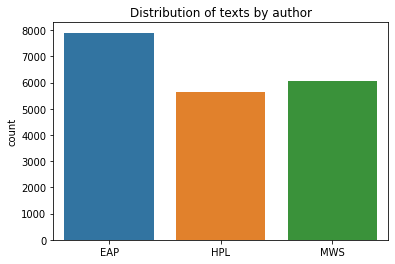

In [28]:
ax = sns.countplot(list(train.author))
ax.set_title("Distribution of texts by author")
plt.show()

### Word distribution

In [29]:
all_words = train['text'].str.split(expand=True).unstack().value_counts()

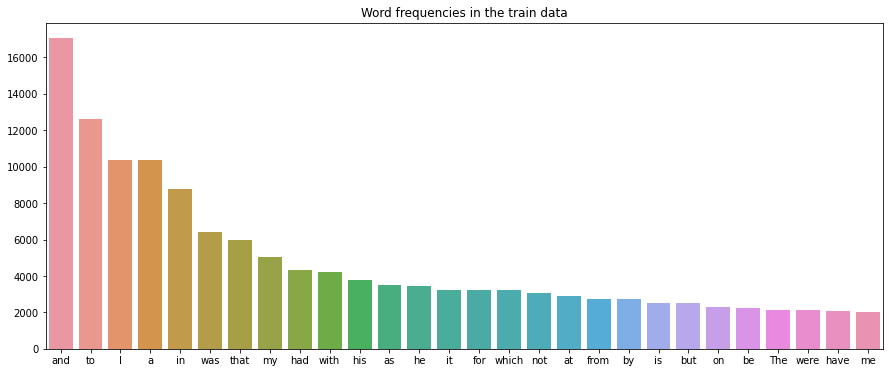

In [30]:
plt.figure(figsize=(15,6))
g = sns.barplot(x = all_words.index.values[2:30],
            y = all_words.values[2:30])
g.set_title('Word frequencies in the train data')
plt.show()

### Wordcloud

In [31]:
EAP = train[train['author']=='EAP']
MWS = train[train['author']=='MWS']
HPL = train[train['author']=='HPL']

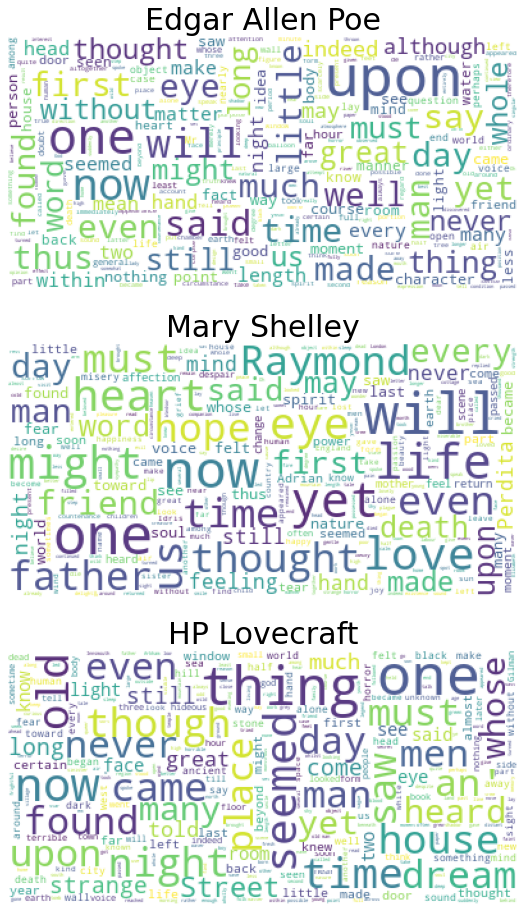

In [32]:
plt.figure(figsize=(22,16))
plt.subplot(311)
wc = WordCloud(background_color="white", max_words=10000,
               stopwords=STOPWORDS, max_font_size= 45)

wc.generate(" ".join(EAP.text))
plt.title("Edgar Allen Poe", fontsize=30)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=4), alpha=0.9)
plt.axis('off')

plt.subplot(312)
wc.generate(" ".join(MWS.text))
plt.title("Mary Shelley", fontsize=30)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=4), alpha=0.9)
plt.axis('off')

plt.subplot(313)
wc.generate(" ".join(HPL.text))
plt.title("HP Lovecraft", fontsize=30)
plt.imshow(wc.recolor(colormap = 'viridis', random_state=4), alpha=0.9)
plt.axis('off')

plt.show()

### Further data exploration

In [33]:
train['sentences'] = train.text.transform(lambda x: len(sent_tokenize(x)))
train['words'] = train.text.transform(lambda x: len(word_tokenize(x)))
train['text_length'] = train.text.transform(lambda x: len(x))

text_info = train.groupby("author")[['sentences','words','text_length']].sum()
text_info

,sentences,words,text_length
author,,,
EAP,8206,232184,1123585
HPL,5876,173979,878178
MWS,6128,188824,916632


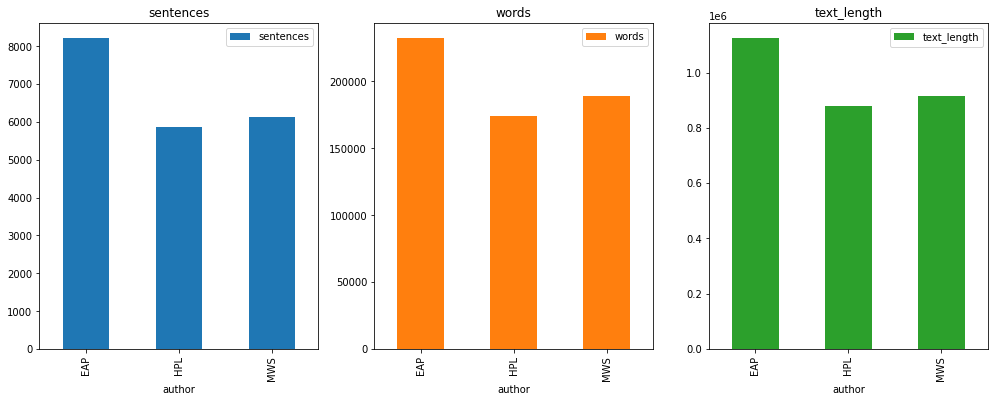

In [34]:
text_info.plot.bar(subplots = True, layout=(1,3), figsize=(17,6))
plt.show()

In [35]:
stop_words = set(stopwords.words('english')).union(set([',','.','?','!',':',';',"'",'"','-',"''"]))
author_dict = {'EAP': 0, 'HPL': 1, 'MWS': 2}

In [36]:
new_text = []
new_author = []
for i, row in train[['text','author']].iterrows():
  word_tokens = word_tokenize(row['text'])
  new_text.append(" ".join([w for w in word_tokens if not w in stop_words]))
  new_author.append(author_dict[row['author']])
new_train = pd.DataFrame(data={'text': new_text, 'author': new_author})

In [37]:
new_test_text = []
for i, row in test[['text']].iterrows():
  word_tokens = word_tokenize(row['text'])
  new_test_text.append(" ".join([w for w in word_tokens if not w in stop_words]))
new_test = pd.DataFrame(data={'text': new_text})

In [38]:
X = new_train['text']
y = new_train['author']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=random_state)
X_test = new_test['text']

In [85]:
new_text_ws = [] # without stopwords
for i, row in train[['text']].iterrows():
  word_tokens = word_tokenize(row['text'])
  new_text_ws.append(" ".join([w for w in word_tokens if not w in [',','.','?','!',':',';',"'",'"','-',"''"]]))
new_train_ws = pd.DataFrame(data={'text': new_text_ws, 'author': new_author})

In [87]:
X_ws = new_train_ws['text']
y_ws = new_train_ws['author']
X_ws_train, X_ws_valid, y_ws_train, y_ws_valid = train_test_split(X_ws, y_ws, test_size=0.3, random_state=random_state)

In [81]:
new_train

,text,author
0,This process however afforded means ascertaini...,0
1,It never occurred fumbling might mere mistake,1
2,In left hand gold snuff box capered hill cutti...,0
3,How lovely spring As looked Windsor Terrace si...,2
4,Finding nothing else even gold Superintendent ...,1
...,...,...
19574,I could fancied I looked eminent landscape pai...,0
19575,The lids clenched together spasm,0
19576,Mais il faut agir say Frenchman never faints o...,0
19577,For item news like strikes us coolly received,0


In [39]:
X_train.head()

5985     Should one wish purchase inquire price article...
1497     He said person apparently great haste demanded...
11425    But still remained burning determination reach...
5444     A letter may compressed thin spiral roll diffe...
10930    He discoursed much beyond doubt learnedly I ha...
Name: text, dtype: object

In [40]:
y_train.head()

5985     0
1497     0
11425    1
5444     0
10930    0
Name: author, dtype: int64

In [41]:
X_valid.head()

8333     I know I lost sensation chains darkness object...
9497     It permitted tell waking earth self real self ...
10984    For centuries lofty battlements frowned upon w...
10423    They looked like strips torn thorn bush foot g...
9267        It occurred bandage surcingle enveloped unique
Name: text, dtype: object

In [42]:
y_valid.head()

8333     2
9497     1
10984    1
10423    0
9267     0
Name: author, dtype: int64

In [43]:
X_test.head()

0    This process however afforded means ascertaini...
1        It never occurred fumbling might mere mistake
2    In left hand gold snuff box capered hill cutti...
3    How lovely spring As looked Windsor Terrace si...
4    Finding nothing else even gold Superintendent ...
Name: text, dtype: object

In [66]:
# Containment Measure
def cm(tokens_o, tokens_p):

  if(len(tokens_p) < 3):
    
    return 0

  else:

    trigrams_o=[]
    for i in range(len(tokens_o)-2):
        t=(tokens_o[i],tokens_o[i+1],tokens_o[i+2])
        trigrams_o.append(t)

    s=0
    trigrams_p=[]
    for i in range(len(tokens_p)-2):
        t=(tokens_p[i],tokens_p[i+1],tokens_p[i+2])
        trigrams_p.append(t)
        if t in trigrams_o:
            s+=1

    return s/len(trigrams_p)

In [67]:
# Longest Common Subsequence
def lcs(tokens_o,tokens_p):

    dp = [[None]*(len(tokens_o)+1) for i in range(len(tokens_p)+1)] 
  
    for i in range(len(tokens_p)+1): 
        for j in range(len(tokens_o)+1): 
            if i == 0 or j == 0: 
                dp[i][j] = 0
            elif tokens_p[i-1] == tokens_o[j-1]: 
                dp[i][j] = dp[i-1][j-1]+1
            else: 
                dp[i][j] = max(dp[i-1][j] , dp[i][j-1]) 
    
    return dp[len(tokens_p)][len(tokens_o)]

In [74]:
X_train_list = list(X_train)
y_train_list = list(y_train)
X_valid_list = list(X_valid)
y_valid_list = list(y_valid)

In [90]:
X_ws_train_list = list(X_ws_train)
y_ws_train_list = list(y_ws_train)
X_ws_valid_list = list(X_ws_valid)
y_ws_valid_list = list(y_ws_valid)

In [ ]:
cm_predictions = [0 for text in range(len(X_valid))]

for t in range(len(X_valid_list)):
  sum_sentences = [0,0,0]
  counter = [0,0,0]

  if(t % 100 == 0):
    print(t)

  for i in range(len(X_train_list)):
    for a in range(3):
      if(y_train_list[i] == a):
        sum_sentences[a] += cm(X_train_list[i].split(' '),X_valid_list[t].split(' '))
        counter[a] += 1

  avg_sentences = [sum_sentences[k]/counter[k] for k in range(3)]

  cm_predictions[t] = np.array(avg_sentences).argmax()

In [91]:
cm_ws_predictions = [0 for text in range(len(X_ws_valid))]

for t in range(len(X_ws_valid_list)):
  sum_sentences = [0,0,0]
  counter = [0,0,0]

  if(t % 100 == 0):
    print(t)

  for i in range(len(X_ws_train_list)):
    for a in range(3):
      if(y_ws_train_list[i] == a):
        sum_sentences[a] += cm(X_ws_train_list[i].split(' '),X_ws_valid_list[t].split(' '))
        counter[a] += 1

  avg_sentences = [sum_sentences[k]/counter[k] for k in range(3)]

  cm_ws_predictions[t] = np.array(avg_sentences).argmax()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800


In [72]:
print(cm_predictions[:100])

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0]


In [93]:
lcs_ws_predictions = [0 for text in range(len(X_ws_valid))]

for t in range(len(X_ws_valid_list)):
  sum_sentences = [0,0,0]
  counter = [0,0,0]

  if(t % 100 == 0):
    print(t)

  for i in range(len(X_ws_train_list)):
    for a in range(3):
      if(y_ws_train_list[i] == a):
        sum_sentences[a] += lcs(X_ws_train_list[i].split(' '),X_ws_valid_list[t].split(' '))
        counter[a] += 1

  avg_sentences = [sum_sentences[k]/counter[k] for k in range(3)]

  lcs_ws_predictions[t] = np.array(avg_sentences).argmax()

0
100
200


KeyboardInterrupt: ignored

In [78]:
accuracy_score(y_valid_list, [0 for i in range(len(y_valid_list))])

0.4078992168879809

In [77]:
accuracy_score(y_valid_list, cm_predictions)

0.4570990806945863

In [92]:
accuracy_score(y_ws_valid_list, cm_ws_predictions)

0.6355124276472591

In [97]:
print(y_ws_valid_list[:100])

[2, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0]


In [98]:
print(cm_ws_predictions[:100])

[2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0]


In [100]:
confusion_matrix(y_ws_valid_list, cm_ws_predictions)

array([[1680,  346,  370],
       [ 421,  986,  247],
       [ 480,  277, 1067]])

In [94]:
accuracy_score(y_valid_list[:200], lcs_ws_predictions[:200])

0.43